In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in `

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

* Read the csv file

In [3]:
df =pd.read_csv("train.csv")
tf = pd.read_csv("test.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [4]:
#Drop the columns who has more than 50% missing values

cols=df.columns[df.isnull().mean()> 0.47]
print(cols)
df=df.drop(cols,axis=1)
df.head()

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [5]:
df_n = df.isnull().sum()
df_n[df_n>0].sort_values(ascending=False)


LotFrontage     259
GarageCond       81
GarageQual       81
GarageFinish     81
GarageYrBlt      81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [6]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
# Checking the most frequently occuring values

miss = df.isnull().sum().sort_values(ascending=False) # finds total number of null values and sorts in descending order
miss = miss[miss > 0] # all null values which are greater than zero
column_name = miss.index # names of column of null values
for var in column_name:
    print(str(var))
    print(df[var].value_counts().index[0])
    print("--"*10)

LotFrontage
60.0
--------------------
GarageFinish
Unf
--------------------
GarageType
Attchd
--------------------
GarageCond
TA
--------------------
GarageQual
TA
--------------------
GarageYrBlt
2005.0
--------------------
BsmtExposure
No
--------------------
BsmtFinType2
Unf
--------------------
BsmtFinType1
Unf
--------------------
BsmtCond
TA
--------------------
BsmtQual
TA
--------------------
MasVnrType
None
--------------------
MasVnrArea
0.0
--------------------
Electrical
SBrkr
--------------------


In [8]:
#Display the rows and columns with missing values
df[df.isnull().any(axis=1)]
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
#percentage and total number of missing values

total = df.isnull().sum().sort_values(ascending=False)
percent = df.isnull().mean().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(14)


,Total,Percent
LotFrontage,259,0.177397
GarageFinish,81,0.055479
GarageType,81,0.055479
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageYrBlt,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342


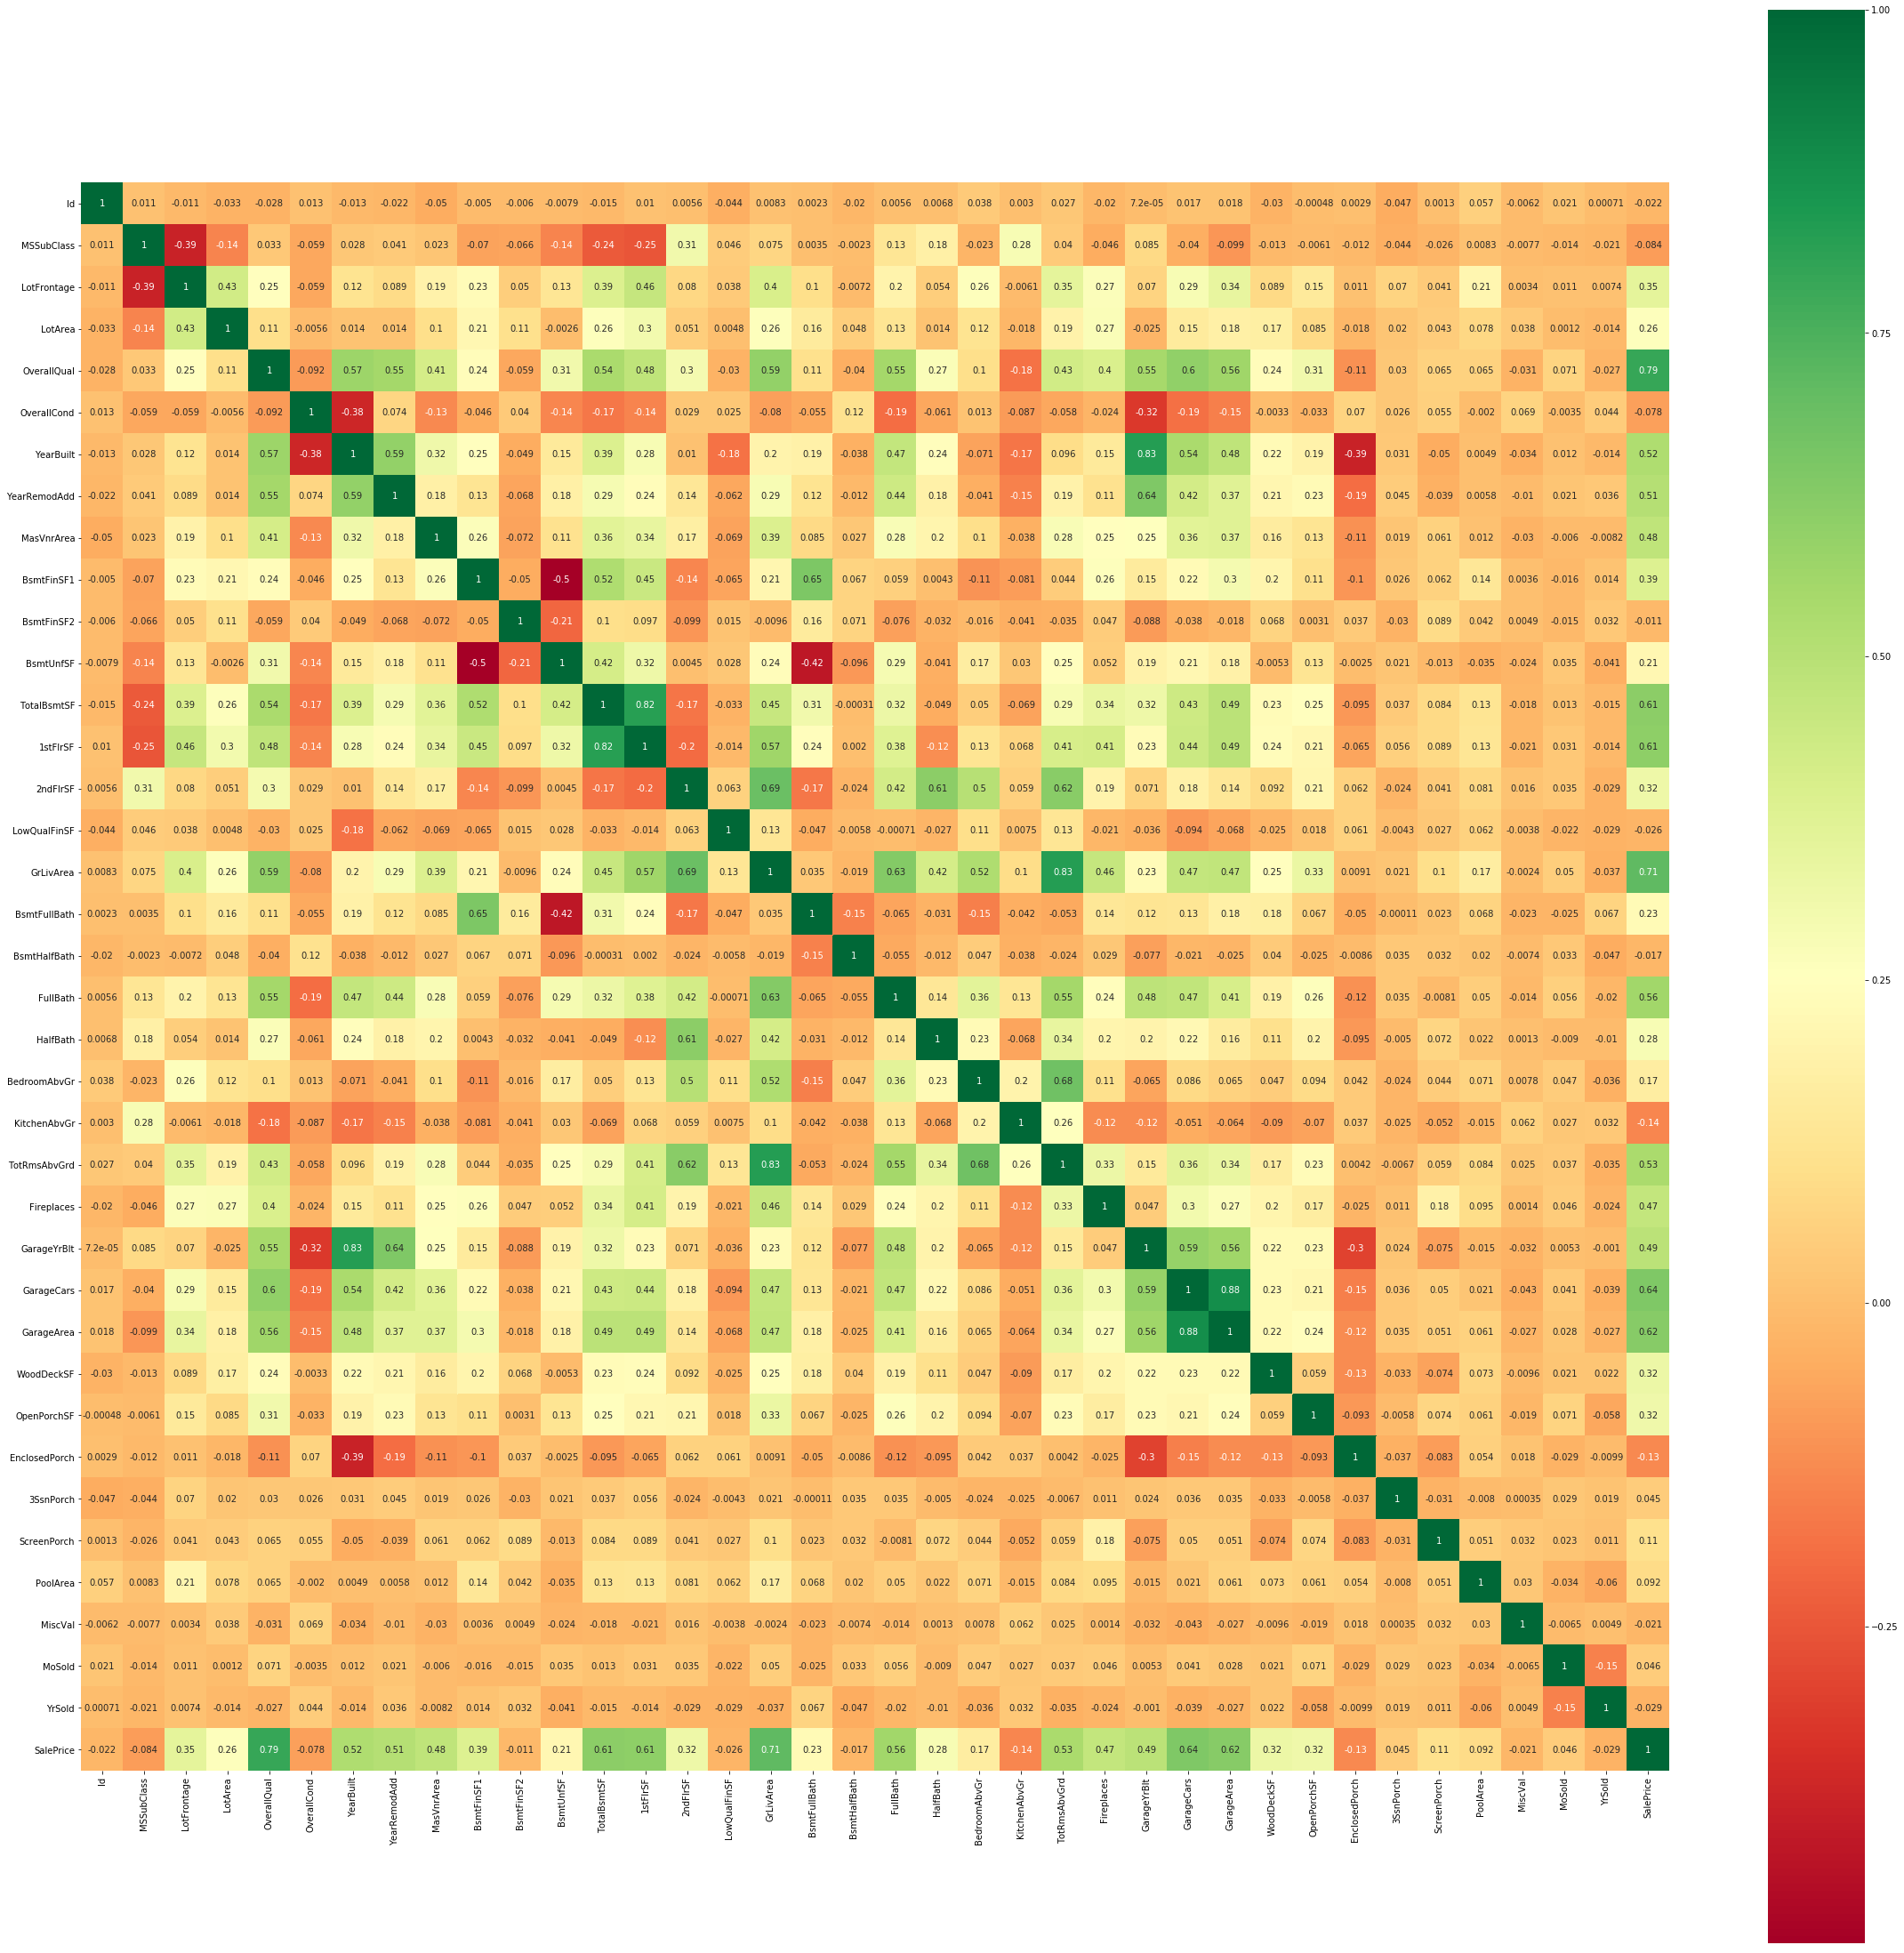

In [10]:
import seaborn as sns
plt.figure(figsize=(40,40))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [11]:
df[df["GarageType"].isnull()][["GarageCars","GarageYrBlt","GarageFinish","GarageCond","GarageQual"]]

,GarageCars,GarageYrBlt,GarageFinish,GarageCond,GarageQual
39,0,NaN,NaN,NaN,NaN
48,0,NaN,NaN,NaN,NaN
78,0,NaN,NaN,NaN,NaN
88,0,NaN,NaN,NaN,NaN
89,0,NaN,NaN,NaN,NaN
99,0,NaN,NaN,NaN,NaN
108,0,NaN,NaN,NaN,NaN
125,0,NaN,NaN,NaN,NaN
127,0,NaN,NaN,NaN,NaN
140,0,NaN,NaN,NaN,NaN


In [12]:
#corr = df.corr()
#corr["G"]

In [13]:
#dropping the columns that are not required. When Garage cars are 0 the Garage conditions are null.

drop_var = ["GarageType","GarageYrBlt","GarageFinish","GarageCond","GarageQual","BsmtExposure","BsmtFinType1","BsmtCond"]
for var in drop_var:
    df= df.drop(var,axis =1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
df.isnull().sum().sort_values(ascending = False).head(6)

LotFrontage     259
BsmtFinType2     38
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [15]:
null_col = df[df.isnull().any(axis=1)]
null_col[["LotFrontage",'Electrical',"MasVnrArea","MasVnrType","BsmtFinType2","BsmtQual"]]

,LotFrontage,Electrical,MasVnrArea,MasVnrType,BsmtFinType2,BsmtQual
7,NaN,SBrkr,240.0,Stone,BLQ,Gd
12,NaN,SBrkr,0.0,None,Unf,TA
14,NaN,SBrkr,212.0,BrkFace,Unf,TA
16,NaN,SBrkr,180.0,BrkFace,Unf,TA
17,72.0,SBrkr,0.0,None,NaN,NaN
24,NaN,SBrkr,0.0,None,ALQ,TA
31,NaN,SBrkr,0.0,None,Unf,TA
39,65.0,FuseP,0.0,None,NaN,NaN
42,NaN,SBrkr,0.0,None,LwQ,Gd
43,NaN,SBrkr,0.0,None,BLQ,Gd


In [16]:
null_col[['Electrical',"MasVnrArea","MasVnrType","BsmtFinType2","BsmtQual"]]

,Electrical,MasVnrArea,MasVnrType,BsmtFinType2,BsmtQual
7,SBrkr,240.0,Stone,BLQ,Gd
12,SBrkr,0.0,None,Unf,TA
14,SBrkr,212.0,BrkFace,Unf,TA
16,SBrkr,180.0,BrkFace,Unf,TA
17,SBrkr,0.0,None,NaN,NaN
24,SBrkr,0.0,None,ALQ,TA
31,SBrkr,0.0,None,Unf,TA
39,FuseP,0.0,None,NaN,NaN
42,SBrkr,0.0,None,LwQ,Gd
43,SBrkr,0.0,None,BLQ,Gd


In [17]:
df[["LotFrontage",'Electrical',"MasVnrArea","MasVnrType","BsmtFinType2","BsmtQual"]].iloc[90]

LotFrontage        60
Electrical      FuseA
MasVnrArea          0
MasVnrType       None
BsmtFinType2      NaN
BsmtQual          NaN
Name: 90, dtype: object

In [18]:
#filling missing values

missing_var = ['LotFrontage','Electrical',"MasVnrArea","MasVnrType","BsmtFinType2","BsmtQual"]
for var in missing_var:
    df[var]= df[var].fillna(df[var].value_counts().index[0])

In [19]:
df.isnull().sum().sum()

0

In [20]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64


In [21]:
#
#
#
# New code

numerical = df.select_dtypes(exclude=["object"])
corr = numerical.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:8], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [22]:
#df.OverallQual.unique()

In [23]:
'''
quality_pivot = df.pivot_table(index = "OverallQual",values = "SalePrice", aggfunc = np.median)
quality_pivot

'''                  

'\nquality_pivot = df.pivot_table(index = "OverallQual",values = "SalePrice", aggfunc = np.median)\nquality_pivot\n\n'

In [24]:
'''
quality_pivot.plot(kind = "bar" , color = "blue")
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

'''

'\nquality_pivot.plot(kind = "bar" , color = "blue")\nplt.xlabel(\'Overall Quality\')\nplt.ylabel(\'Median Sale Price\')\nplt.xticks(rotation=0)\nplt.show()\n\n'

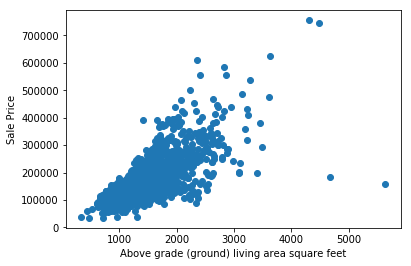

In [25]:
plt.scatter(x = df["GrLivArea"],y = df.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

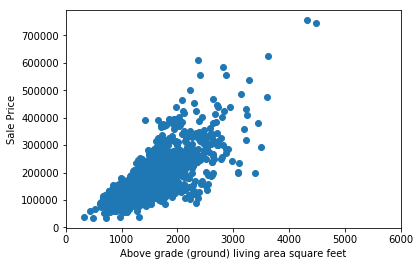

In [26]:
df= df[df["GrLivArea"]<4500]
plt.scatter(x = df["GrLivArea"],y = df.SalePrice)
plt.xlim(0,6000)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

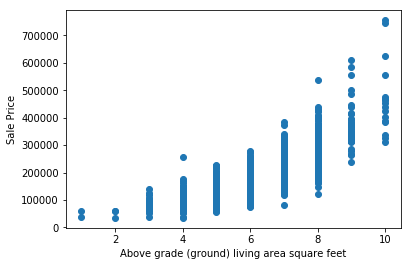

In [27]:
plt.scatter(x=df['OverallQual'], y=df.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

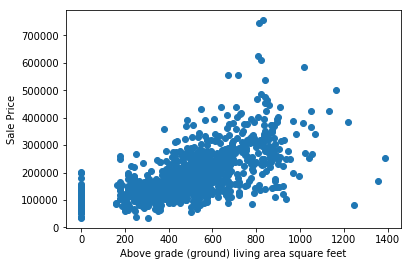

In [28]:
plt.scatter(x=df['GarageArea'], y=df.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

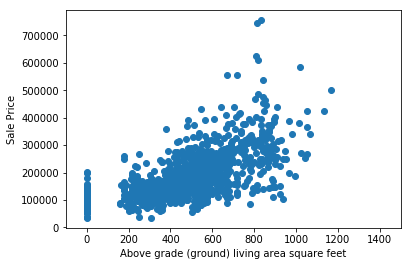

In [29]:
df = df[df["GarageArea"]<1200]
plt.xlim(-100,1500)
plt.scatter(x=df['GarageArea'], y=df.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()


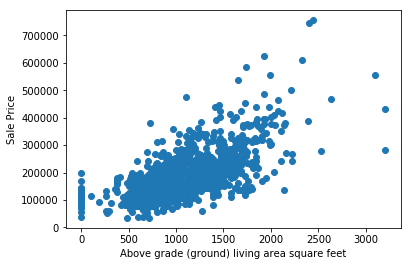

In [30]:
plt.scatter(x=df['TotalBsmtSF'], y=df.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

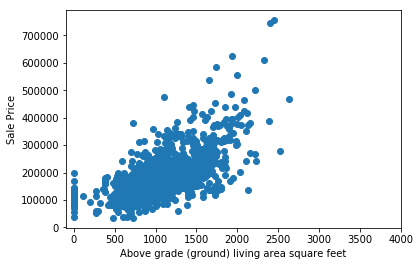

In [31]:
df = df[df['TotalBsmtSF']<3000]
plt.xlim(-100,4000)
plt.scatter(x=df['TotalBsmtSF'], y=df.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

In [32]:
# categorical data to numerical data conversion

from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
labl = ["Street","CentralAir"]
for var in labl:
    df[var]= model.fit_transform(df[var])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [33]:
# categorical data to numerical data conversion

replace_Lots = {"LotShape":{"Reg":3,"IR1":2,"IR2":1,"IR3":0}}
df.replace(replace_Lots,inplace=True)
df = df.astype({"LotShape":int})

replace_land_s = {"LandSlope":{"Gtl":2,"Mod":1,"Sev":0}}
df.replace(replace_land_s,inplace = True)
df = df.astype({"LandSlope":int})

data_h = ["ExterQual","ExterCond","HeatingQC","KitchenQual"]
for var in data_h:
    replace_data_h = {var:{"Ex":4,"Gd":3,"TA":2,"Fa":1,"Po":0}}
    df.replace(replace_data_h,inplace = True)
df = df.astype({"ExterQual":int,"ExterCond":int,"HeatingQC":int,"KitchenQual":int})

replace_bsmtqual = {"BsmtQual":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"NA":0}}
df.replace(replace_bsmtqual,inplace = True)
df = df.astype({"BsmtQual":int})

replace_pave_d = {"PavedDrive":{"Y":2,"P":1,"N":0}}
df.replace(replace_pave_d,inplace = True)
df = df.astype({"PavedDrive":int})

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,3,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,3,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,2,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,2,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,2,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [34]:
df["LotShape"].dtypes

dtype('int32')

In [35]:
numercial = df.select_dtypes(exclude=["object"])
numercial

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,1,3,2,7,5,2003,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,1,3,2,6,8,1976,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,1,2,2,7,5,2001,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,1,2,2,7,5,1915,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,1,2,2,8,5,2000,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,1,2,2,5,5,1993,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,1,3,2,8,5,2004,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,60.0,10382,1,2,2,7,6,1973,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,1,3,2,7,5,1931,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,1,3,2,5,6,1939,...,0,4,0,0,0,0,0,1,2008,118000


In [36]:
df.select_dtypes(include=["object"])

,MSZoning,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtFinType2,Heating,Electrical,Functional,SaleType,SaleCondition
0,RL,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,VinylSd,BrkFace,PConc,Unf,GasA,SBrkr,Typ,WD,Normal
1,RL,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,MetalSd,MetalSd,None,CBlock,Unf,GasA,SBrkr,Typ,WD,Normal
2,RL,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,VinylSd,BrkFace,PConc,Unf,GasA,SBrkr,Typ,WD,Normal
3,RL,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,Wd Sdng,Wd Shng,None,BrkTil,Unf,GasA,SBrkr,Typ,WD,Abnorml
4,RL,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,VinylSd,BrkFace,PConc,Unf,GasA,SBrkr,Typ,WD,Normal
5,RL,Lvl,AllPub,Inside,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,...,VinylSd,VinylSd,None,Wood,Unf,GasA,SBrkr,Typ,WD,Normal
6,RL,Lvl,AllPub,Inside,Somerst,Norm,Norm,1Fam,1Story,Gable,...,VinylSd,VinylSd,Stone,PConc,Unf,GasA,SBrkr,Typ,WD,Normal
7,RL,Lvl,AllPub,Corner,NWAmes,PosN,Norm,1Fam,2Story,Gable,...,HdBoard,HdBoard,Stone,CBlock,BLQ,GasA,SBrkr,Typ,WD,Normal
8,RM,Lvl,AllPub,Inside,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,...,BrkFace,Wd Shng,None,BrkTil,Unf,GasA,FuseF,Min1,WD,Abnorml
9,RL,Lvl,AllPub,Corner,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,...,MetalSd,MetalSd,None,BrkTil,Unf,GasA,SBrkr,Typ,WD,Normal


In [37]:
# categorical data to numerical data conversion

catego = df.select_dtypes(include=["object"])
catego_copy = catego.copy()
catego = pd.get_dummies(catego)
catego.head()


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [38]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,3,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,3,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,2,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,2,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,2,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [39]:
df =pd.concat([df,catego],axis =1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,1,3,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
1,2,20,RL,80.0,9600,1,3,Lvl,AllPub,FR2,...,0,0,0,1,0,0,0,0,1,0
2,3,60,RL,68.0,11250,1,2,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
3,4,70,RL,60.0,9550,1,2,Lvl,AllPub,Corner,...,0,0,0,1,1,0,0,0,0,0
4,5,60,RL,84.0,14260,1,2,Lvl,AllPub,FR2,...,0,0,0,1,0,0,0,0,1,0


In [40]:
catego_copy.head()

,MSZoning,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtFinType2,Heating,Electrical,Functional,SaleType,SaleCondition
0,RL,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,VinylSd,BrkFace,PConc,Unf,GasA,SBrkr,Typ,WD,Normal
1,RL,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,MetalSd,MetalSd,None,CBlock,Unf,GasA,SBrkr,Typ,WD,Normal
2,RL,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,VinylSd,BrkFace,PConc,Unf,GasA,SBrkr,Typ,WD,Normal
3,RL,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,Wd Sdng,Wd Shng,None,BrkTil,Unf,GasA,SBrkr,Typ,WD,Abnorml
4,RL,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,VinylSd,BrkFace,PConc,Unf,GasA,SBrkr,Typ,WD,Normal


In [41]:
#getting names of columns that can be dropped

x = catego_copy.columns
print(x)
for var in x:
    highest = df[var].value_counts().index[0]
    print(highest)
    for num in highest:
        name = var+"_"+highest
        print(name)
        break
        

Index(['MSZoning', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtFinType2', 'Heating', 'Electrical', 'Functional', 'SaleType',
       'SaleCondition'],
      dtype='object')
RL
MSZoning_RL
Lvl
LandContour_Lvl
AllPub
Utilities_AllPub
Inside
LotConfig_Inside
NAmes
Neighborhood_NAmes
Norm
Condition1_Norm
Norm
Condition2_Norm
1Fam
BldgType_1Fam
1Story
HouseStyle_1Story
Gable
RoofStyle_Gable
CompShg
RoofMatl_CompShg
VinylSd
Exterior1st_VinylSd
VinylSd
Exterior2nd_VinylSd
None
MasVnrType_None
PConc
Foundation_PConc
Unf
BsmtFinType2_Unf
GasA
Heating_GasA
SBrkr
Electrical_SBrkr
Typ
Functional_Typ
WD
SaleType_WD
Normal
SaleCondition_Normal


In [42]:
df.drop(["MSZoning_RL","LandContour_Lvl","Utilities_AllPub","LotConfig_Inside","Neighborhood_NAmes","Condition1_Norm","Condition2_Norm",
        "BldgType_1Fam","HouseStyle_1Story","RoofStyle_Gable","RoofMatl_CompShg","Exterior1st_VinylSd","Exterior2nd_VinylSd",
        "MasVnrType_None","Foundation_PConc","BsmtFinType2_Unf","Heating_GasA","Electrical_SBrkr","Functional_Typ","SaleType_WD",
       "SaleCondition_Normal"],axis=1,inplace= True)

In [43]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
0,1,60,RL,65.0,8450,1,3,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,1,3,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,1,2,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,1,2,Lvl,AllPub,Corner,...,0,0,0,0,0,1,0,0,0,0
4,5,60,RL,84.0,14260,1,2,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0


In [44]:
x = catego_copy.columns
for var in x:
    df= df.drop (var,axis=1)
    
df = df.drop("Id",axis = 1)
df.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
0,60,65.0,8450,1,3,2,7,5,2003,2003,...,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,1,3,2,6,8,1976,1976,...,0,0,0,0,0,0,0,0,0,0
2,60,68.0,11250,1,2,2,7,5,2001,2002,...,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,1,2,2,7,5,1915,1970,...,0,0,0,0,0,1,0,0,0,0
4,60,84.0,14260,1,2,2,8,5,2000,2000,...,0,0,0,0,0,0,0,0,0,0


In [45]:
list(df.columns)


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RM',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',

In [46]:

df.columns.get_loc("SalePrice")

45

In [47]:
df.dtypes

MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
Street                     int32
LotShape                   int32
LandSlope                  int32
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
ExterQual                  int32
ExterCond                  int32
BsmtQual                   int32
BsmtFinSF1                 int64
BsmtFinSF2                 int64
BsmtUnfSF                  int64
TotalBsmtSF                int64
HeatingQC                  int32
CentralAir                 int32
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath               int64
BsmtHalfBath               int64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
          

In [48]:
df = df.set_index('SalePrice').reset_index()


In [49]:
df.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
0,208500,60,65.0,8450,1,3,2,7,5,2003,...,0,0,0,0,0,0,0,0,0,0
1,181500,20,80.0,9600,1,3,2,6,8,1976,...,0,0,0,0,0,0,0,0,0,0
2,223500,60,68.0,11250,1,2,2,7,5,2001,...,0,0,0,0,0,0,0,0,0,0
3,140000,70,60.0,9550,1,2,2,7,5,1915,...,0,0,0,0,0,1,0,0,0,0
4,250000,60,84.0,14260,1,2,2,8,5,2000,...,0,0,0,0,0,0,0,0,0,0


Skew:  1.8764328764555576


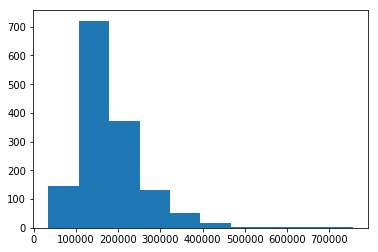

In [50]:
print("Skew: ",df["SalePrice"].skew())
plt.hist(df["SalePrice"])
plt.show()

Skew is: 0.10796318039619734


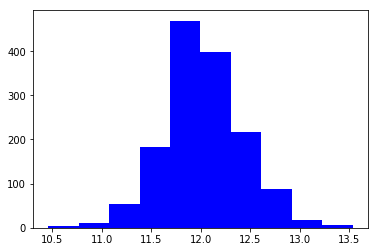

In [51]:
target = np.log(df.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

**Selecting the Feature Matrix and Target Vector**

In [52]:
fm = df.iloc[:,1:]
tv = np.log(df["SalePrice"])

In [53]:
print(fm.shape) 
print(fm.ndim)
print(tv.shape)
print(tv.ndim)

(1451, 187)
2
(1451,)
1


In [54]:
from sklearn.model_selection import train_test_split
fm_train,fm_test,tv_train,tv_test = train_test_split(fm,tv,test_size = 0.2,random_state=123)


In [55]:

print(fm_train.shape)
print(fm_test.shape)
print(tv_train.shape)
print(tv_test.shape)

(1160, 187)
(291, 187)
(1160,)
(291,)


In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=fm_train, y= tv_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
print(model.score(X=fm_train, y=tv_train))
print(model.score(X=fm_test, y=tv_test))

0.9443905046852556
0.9161848868460651


In [58]:
for i in fm_train.columns : 
    print(i)
    print("--" * 10)
    for j in np.arange(1, 4, 1) : 
        print("Order : " + str(j))
        print("--" * 10)
        model = LinearRegression()
        model.fit(X=fm_train[[i]] ** j, y=tv_train)

        print("Train : " , model.score(X=fm_train[[i]] ** j, y=tv_train))
        print("Test  : " , model.score(X=fm_test[[i]] ** j, y=tv_test))
        print("-" * 10)

MSSubClass
--------------------
Order : 1
--------------------
Train :  0.003747111295548944
Test  :  0.008400962319699445
----------
Order : 2
--------------------
Train :  0.013091746525194403
Test  :  0.022804473587059837
----------
Order : 3
--------------------
Train :  0.020996105894568684
Test  :  0.03300750668205832
----------
LotFrontage
--------------------
Order : 1
--------------------
Train :  0.12384979269214336
Test  :  0.08066290577964332
----------
Order : 2
--------------------
Train :  0.10846049769771138
Test  :  -0.11826815932580415
----------
Order : 3
--------------------
Train :  0.08024962124133472
Test  :  -0.7697883476235854
----------
LotArea
--------------------
Order : 1
--------------------
Train :  0.06633184847424223
Test  :  0.07658608279100643
----------
Order : 2
--------------------
Train :  0.010518753769799605
Test  :  0.015407156998770266
----------
Order : 3
--------------------
Train :  0.0056760318818506175
Test  :  0.006413689945200529
------

Train :  0.32224130373273374
Test  :  0.3169729179405427
----------
HalfBath
--------------------
Order : 1
--------------------
Train :  0.09886337551646908
Test  :  0.11479464207023238
----------
Order : 2
--------------------
Train :  0.06955638026229338
Test  :  0.0911906121388052
----------
Order : 3
--------------------
Train :  0.030171160878709413
Test  :  0.04601221169230485
----------
BedroomAbvGr
--------------------
Order : 1
--------------------
Train :  0.045846980374288804
Test  :  0.040111835597123724
----------
Order : 2
--------------------
Train :  0.03988007811625427
Test  :  0.02998698628724983
----------
Order : 3
--------------------
Train :  0.025231834297909872
Test  :  0.017510018769945512
----------
KitchenAbvGr
--------------------
Order : 1
--------------------
Train :  0.021181735604119845
Test  :  0.023900879642130612
----------
Order : 2
--------------------
Train :  0.021776784736159405
Test  :  0.022441520393984834
----------
Order : 3
----------------

Train :  0.00020378375517060565
Test  :  -1.8541765260282617e-05
----------
Order : 2
--------------------
Train :  0.00020378375517060565
Test  :  -1.8541765260282617e-05
----------
Order : 3
--------------------
Train :  0.00020378375517060565
Test  :  -1.8541765260282617e-05
----------
LotConfig_Corner
--------------------
Order : 1
--------------------
Train :  9.57149391922485e-06
Test  :  9.002297485394273e-05
----------
Order : 2
--------------------
Train :  9.57149391922485e-06
Test  :  9.002297485394273e-05
----------
Order : 3
--------------------
Train :  9.57149391922485e-06
Test  :  9.002297485394273e-05
----------
LotConfig_CulDSac
--------------------
Order : 1
--------------------
Train :  0.025997463888122962
Test  :  0.011619074089787351
----------
Order : 2
--------------------
Train :  0.025997463888122962
Test  :  0.011619074089787351
----------
Order : 3
--------------------
Train :  0.025997463888122962
Test  :  0.011619074089787351
----------
LotConfig_FR2
----

Test  :  0.006720143782145471
----------
Neighborhood_SawyerW
--------------------
Order : 1
--------------------
Train :  0.0010228381913931495
Test  :  0.0020509424989012537
----------
Order : 2
--------------------
Train :  0.0010228381913931495
Test  :  0.0020509424989012537
----------
Order : 3
--------------------
Train :  0.0010228381913931495
Test  :  0.0020509424989012537
----------
Neighborhood_Somerst
--------------------
Order : 1
--------------------
Train :  0.036036611750351555
Test  :  0.009570882115457091
----------
Order : 2
--------------------
Train :  0.036036611750351555
Test  :  0.009570882115457091
----------
Order : 3
--------------------
Train :  0.036036611750351555
Test  :  0.009570882115457091
----------
Neighborhood_StoneBr
--------------------
Order : 1
--------------------
Train :  0.035031868864759064
Test  :  0.0348917605825354
----------
Order : 2
--------------------
Train :  0.035031868864759064
Test  :  0.0348917605825354
----------
Order : 3
-----

Train :  0.011096271346689779
Test  :  0.011767461353109798
----------
Order : 3
--------------------
Train :  0.011096271346689779
Test  :  0.011767461353109798
----------
HouseStyle_2.5Fin
--------------------
Order : 1
--------------------
Train :  0.0004285895666731321
Test  :  0.002592514343993213
----------
Order : 2
--------------------
Train :  0.0004285895666731321
Test  :  0.002592514343993213
----------
Order : 3
--------------------
Train :  0.0004285895666731321
Test  :  0.002592514343993213
----------
HouseStyle_2.5Unf
--------------------
Order : 1
--------------------
Train :  7.970640947341234e-05
Test  :  0.0013642111376312993
----------
Order : 2
--------------------
Train :  7.970640947341234e-05
Test  :  0.0013642111376312993
----------
Order : 3
--------------------
Train :  7.970640947341234e-05
Test  :  0.0013642111376312993
----------
HouseStyle_2Story
--------------------
Order : 1
--------------------
Train :  0.07803862847038168
Test  :  0.054086711919081654

Train :  0.0011670165750243822
Test  :  -3.1687692491066954e-05
----------
Exterior1st_MetalSd
--------------------
Order : 1
--------------------
Train :  0.03106912107488391
Test  :  0.02093629968079314
----------
Order : 2
--------------------
Train :  0.03106912107488391
Test  :  0.02093629968079314
----------
Order : 3
--------------------
Train :  0.03106912107488391
Test  :  0.02093629968079314
----------
Exterior1st_Plywood
--------------------
Order : 1
--------------------
Train :  7.331800737209182e-05
Test  :  0.00044111252632184067
----------
Order : 2
--------------------
Train :  7.331800737209182e-05
Test  :  0.00044111252632184067
----------
Order : 3
--------------------
Train :  7.331800737209182e-05
Test  :  0.00044111252632184067
----------
Exterior1st_Stone
--------------------
Order : 1
--------------------
Train :  0.0005941402291390618
Test  :  0.0048170962862755795
----------
Order : 2
--------------------
Train :  0.0005941402291390618
Test  :  0.004817096286

Train :  0.10414075265043032
Test  :  0.075098992474254
----------
Foundation_BrkTil
--------------------
Order : 1
--------------------
Train :  0.07182596804057118
Test  :  0.034517172287836684
----------
Order : 2
--------------------
Train :  0.07182596804057118
Test  :  0.034517172287836684
----------
Order : 3
--------------------
Train :  0.07182596804057118
Test  :  0.034517172287836684
----------
Foundation_CBlock
--------------------
Order : 1
--------------------
Train :  0.11747645987618772
Test  :  0.0914699581374614
----------
Order : 2
--------------------
Train :  0.11747645987618772
Test  :  0.0914699581374614
----------
Order : 3
--------------------
Train :  0.11747645987618772
Test  :  0.0914699581374614
----------
Foundation_Slab
--------------------
Order : 1
--------------------
Train :  0.023010516044031256
Test  :  0.03323944187603778
----------
Order : 2
--------------------
Train :  0.023010516044031256
Test  :  0.03323944187603778
----------
Order : 3
------

----------
Order : 2
--------------------
Train :  0.00036364010296074945
Test  :  -1.7431075349350067e-05
----------
Order : 3
--------------------
Train :  0.00036364010296074945
Test  :  -1.7431075349350067e-05
----------
SaleType_COD
--------------------
Order : 1
--------------------
Train :  0.0071252143682180025
Test  :  0.007913919437451233
----------
Order : 2
--------------------
Train :  0.0071252143682180025
Test  :  0.007913919437451233
----------
Order : 3
--------------------
Train :  0.0071252143682180025
Test  :  0.007913919437451233
----------
SaleType_CWD
--------------------
Order : 1
--------------------
Train :  0.0007087840592898688
Test  :  -3.7852057335419076e-05
----------
Order : 2
--------------------
Train :  0.0007087840592898688
Test  :  -3.7852057335419076e-05
----------
Order : 3
--------------------
Train :  0.0007087840592898688
Test  :  -3.7852057335419076e-05
----------
SaleType_Con
--------------------
Order : 1
--------------------
Train :  0.0024

In [59]:
#LotShape,OverallCond2,CentralAir,2ndFlrSF2,HalfBath,BedroomAbvGr3,KitchenAbvGr,PavedDrive2,WoodDeckSF,OpenPorchSF,Neighborhood_Edwards,Neighborhood_OldTown,Exterior1st_CemntBd,Exterior2nd_CmentBd,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Electrical_FuseA,SaleType_New,SaleCondition_Partial        

#OverallQual,YearBuilt,YearRemodAdd,ExterQual3,HeatingQC3,FullBath,KitchenQual(1 or 2 ),GarageCars2,GarageArea,MSZoning_RM,Neighborhood_NridgHt,Foundation_CBlock                  


#MasVnrArea,TotRmsAbvGrd,Fireplaces

In [60]:
fm_train["OverallCond2"] = fm_train["OverallCond"] ** 2
fm_test["OverallCond2"] = fm_test["OverallCond"] ** 2

fm_train["2ndFlrSF2"] = fm_train["2ndFlrSF"] ** 2
fm_test["2ndFlrSF2"] = fm_test["2ndFlrSF"] ** 2

fm_train["BedroomAbvGr3"] = fm_train["BedroomAbvGr"] ** 3
fm_test["BedroomAbvGr3"] = fm_test["BedroomAbvGr"] ** 3

fm_train["PavedDrive2"] = fm_train["PavedDrive"] ** 2
fm_test["PavedDrive2"] = fm_test["PavedDrive"] ** 2

fm_train["ExterQual3"] = fm_train["ExterQual"] ** 3
fm_test["ExterQual3"] = fm_test["ExterQual"] ** 3

fm_train["HeatingQC3"] = fm_train["HeatingQC"] ** 3
fm_test["HeatingQC3"] = fm_test["HeatingQC"] ** 3

fm_train["GarageCars2"] = fm_train["GarageCars"] ** 2
fm_test["GarageCars2"] = fm_test["GarageCars"] ** 2

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [61]:
fm_train = fm_train.drop(["GarageCars","HeatingQC","ExterQual","PavedDrive","BedroomAbvGr","2ndFlrSF","OverallCond"],axis = 1)
fm_test =  fm_test.drop(["GarageCars","HeatingQC","ExterQual","PavedDrive","BedroomAbvGr","2ndFlrSF","OverallCond"],axis = 1)

In [62]:
fm_train.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,OverallCond2,2ndFlrSF2,BedroomAbvGr3,PavedDrive2,ExterQual3,HeatingQC3,GarageCars2
990,20,60.0,10659,1,2,2,5,1961,1961,0.0,...,0,0,0,36,0,27,4,8,8,1
684,120,61.0,7577,1,2,2,6,2005,2006,256.0,...,0,0,0,25,0,8,4,27,64,4
78,90,72.0,10778,1,3,2,4,1968,1968,0.0,...,0,0,0,25,0,64,4,8,8,0
5,50,85.0,14115,1,2,2,5,1993,1995,0.0,...,0,0,0,25,320356,1,4,8,64,4
1353,50,60.0,12513,1,2,2,4,1920,2007,0.0,...,0,0,0,16,208849,64,4,8,27,1


In [63]:
fm_train.shape

(1160, 187)

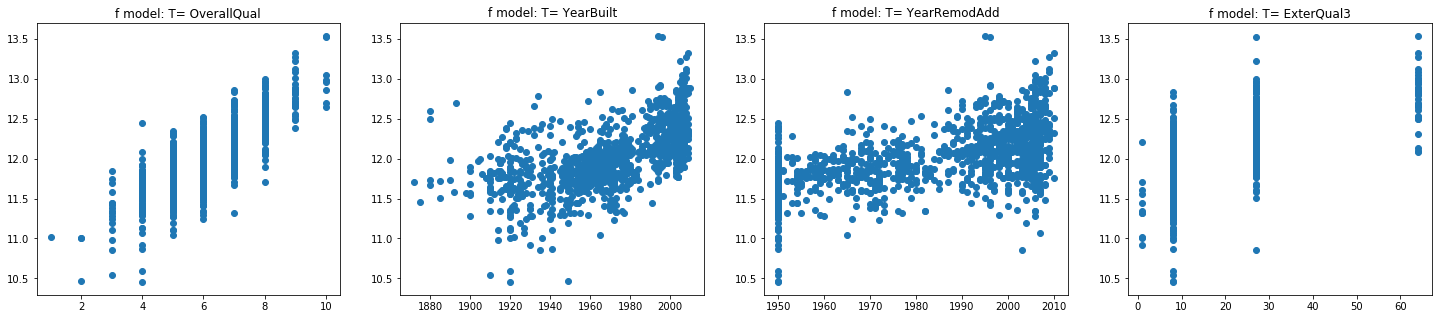

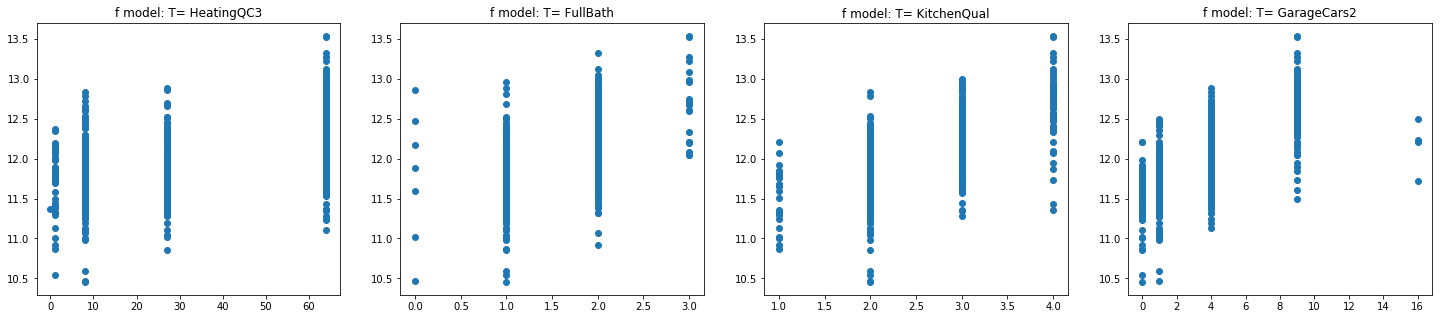

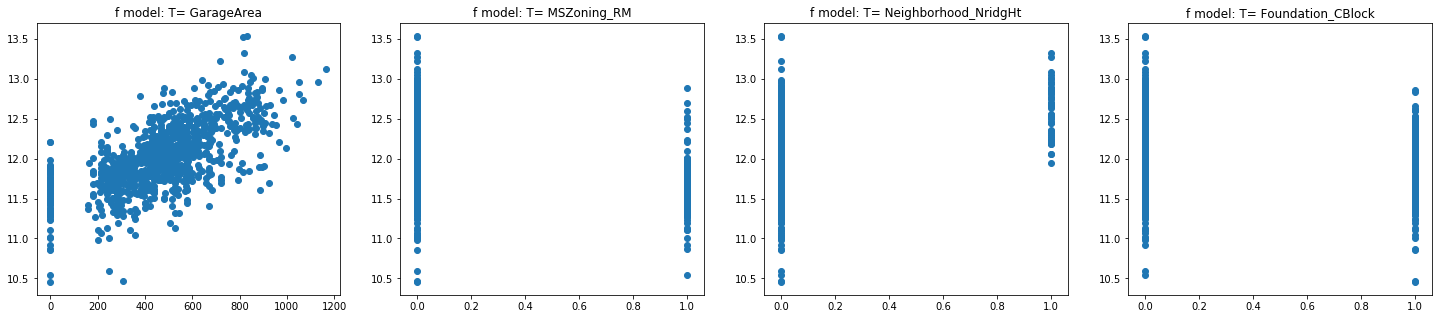

In [64]:
figures_per_time = 4
count = 0
vars = ["OverallQual","YearBuilt","YearRemodAdd","ExterQual3","HeatingQC3","FullBath","KitchenQual",
                        "GarageCars2","GarageArea","MSZoning_RM","Neighborhood_NridgHt","Foundation_CBlock"]
for var in vars:
    x = fm_train[var]
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, tv_train)
    plt.title('f model: T= {}'.format(var))
    count+=1

In [65]:
model= LinearRegression()
model.fit(X=fm_train,y=tv_train)

print(model.score(X=fm_train, y=tv_train))
print(model.score(X=fm_test, y=tv_test))


0.9443395473264284
0.9138721740057856


In [66]:
predictions = model.predict(fm_test)

In [67]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(tv_test, predictions))

RMSE is: 
 0.015222648777446522


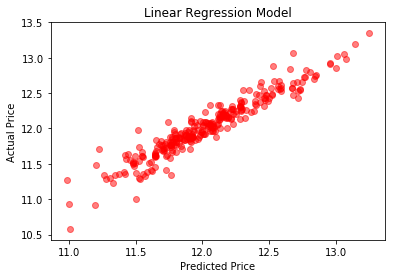

In [68]:
actual_values = tv_test
plt.scatter(predictions, actual_values, alpha=.5,
            color='r') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [69]:
'''
fm_train_new = fm_train[["OverallQual","YearBuilt","YearRemodAdd","ExterQual3","HeatingQC3","FullBath","KitchenQual",
                        "GarageCars2","GarageArea","MSZoning_RM","Neighborhood_NridgHt","Foundation_CBlock"]]
fm_test_new = fm_test[["OverallQual","YearBuilt","YearRemodAdd","ExterQual3","HeatingQC3","FullBath","KitchenQual",
                        "GarageCars2","GarageArea","MSZoning_RM","Neighborhood_NridgHt","Foundation_CBlock"]]

model = LinearRegression()
model.fit(X=fm_train_new,y=tv_train)

print(model.score(X=fm_train_new, y=tv_train))
print(model.score(X=fm_test_new, y=tv_test))

'''

'\nfm_train_new = fm_train[["OverallQual","YearBuilt","YearRemodAdd","ExterQual3","HeatingQC3","FullBath","KitchenQual",\n                        "GarageCars2","GarageArea","MSZoning_RM","Neighborhood_NridgHt","Foundation_CBlock"]]\nfm_test_new = fm_test[["OverallQual","YearBuilt","YearRemodAdd","ExterQual3","HeatingQC3","FullBath","KitchenQual",\n                        "GarageCars2","GarageArea","MSZoning_RM","Neighborhood_NridgHt","Foundation_CBlock"]]\n\nmodel = LinearRegression()\nmodel.fit(X=fm_train_new,y=tv_train)\n\nprint(model.score(X=fm_train_new, y=tv_train))\nprint(model.score(X=fm_test_new, y=tv_test))\n\n'

In [70]:
'''
fm_train_new = fm_train[["OverallQual","YearBuilt","YearRemodAdd","ExterQual3","HeatingQC3","FullBath","KitchenQual",
                        "GarageCars2","GarageArea","MSZoning_RM","Neighborhood_NridgHt","Foundation_CBlock","LotShape",
                         "OverallCond2","CentralAir","2ndFlrSF2","HalfBath","BedroomAbvGr3","KitchenAbvGr","PavedDrive2",
                         "WoodDeckSF","OpenPorchSF","Neighborhood_Edwards","Neighborhood_OldTown","Exterior1st_CemntBd",
                         "Exterior2nd_CmentBd","MasVnrType_BrkFace","MasVnrType_Stone","Foundation_BrkTil",
                         "Electrical_FuseA","SaleType_New","SaleCondition_Partial"]]
fm_test_new = fm_test[["OverallQual","YearBuilt","YearRemodAdd","ExterQual3","HeatingQC3","FullBath","KitchenQual",
                        "GarageCars2","GarageArea","MSZoning_RM","Neighborhood_NridgHt","Foundation_CBlock","LotShape",
                         "OverallCond2","CentralAir","2ndFlrSF2","HalfBath","BedroomAbvGr3","KitchenAbvGr","PavedDrive2",
                         "WoodDeckSF","OpenPorchSF","Neighborhood_Edwards","Neighborhood_OldTown","Exterior1st_CemntBd",
                         "Exterior2nd_CmentBd","MasVnrType_BrkFace","MasVnrType_Stone","Foundation_BrkTil",
                         "Electrical_FuseA","SaleType_New","SaleCondition_Partial"]]

model = LinearRegression()
model.fit(X=fm_train_new,y=tv_train)

print(model.score(X=fm_train_new, y=tv_train))
print(model.score(X=fm_test_new, y=tv_test))

'''

'\nfm_train_new = fm_train[["OverallQual","YearBuilt","YearRemodAdd","ExterQual3","HeatingQC3","FullBath","KitchenQual",\n                        "GarageCars2","GarageArea","MSZoning_RM","Neighborhood_NridgHt","Foundation_CBlock","LotShape",\n                         "OverallCond2","CentralAir","2ndFlrSF2","HalfBath","BedroomAbvGr3","KitchenAbvGr","PavedDrive2",\n                         "WoodDeckSF","OpenPorchSF","Neighborhood_Edwards","Neighborhood_OldTown","Exterior1st_CemntBd",\n                         "Exterior2nd_CmentBd","MasVnrType_BrkFace","MasVnrType_Stone","Foundation_BrkTil",\n                         "Electrical_FuseA","SaleType_New","SaleCondition_Partial"]]\nfm_test_new = fm_test[["OverallQual","YearBuilt","YearRemodAdd","ExterQual3","HeatingQC3","FullBath","KitchenQual",\n                        "GarageCars2","GarageArea","MSZoning_RM","Neighborhood_NridgHt","Foundation_CBlock","LotShape",\n                         "OverallCond2","CentralAir","2ndFlrSF2","HalfBath","Be

In [71]:
'''
fm_train_new = fm_train[["OverallQual","YearBuilt","YearRemodAdd","ExterQual3","HeatingQC3","FullBath","KitchenQual",
                        "GarageCars2","GarageArea","MSZoning_RM","Neighborhood_NridgHt","Foundation_CBlock","LotShape",
                         "OverallCond2","CentralAir","2ndFlrSF2","HalfBath","BedroomAbvGr3","KitchenAbvGr","PavedDrive2",
                         "WoodDeckSF","OpenPorchSF","Neighborhood_Edwards","Neighborhood_OldTown","Exterior1st_CemntBd",
                         "Exterior2nd_CmentBd","MasVnrType_BrkFace","MasVnrType_Stone","Foundation_BrkTil",
                        "Electrical_FuseA","SaleType_New","SaleCondition_Partial","MasVnrArea","TotRmsAbvGrd","Fireplaces"]]
fm_test_new = fm_test[["OverallQual","YearBuilt","YearRemodAdd","ExterQual3","HeatingQC3","FullBath","KitchenQual",
                        "GarageCars2","GarageArea","MSZoning_RM","Neighborhood_NridgHt","Foundation_CBlock","LotShape",
                         "OverallCond2","CentralAir","2ndFlrSF2","HalfBath","BedroomAbvGr3","KitchenAbvGr","PavedDrive2",
                         "WoodDeckSF","OpenPorchSF","Neighborhood_Edwards","Neighborhood_OldTown","Exterior1st_CemntBd",
                         "Exterior2nd_CmentBd","MasVnrType_BrkFace","MasVnrType_Stone","Foundation_BrkTil",
                         "Electrical_FuseA","SaleType_New","SaleCondition_Partial","MasVnrArea","TotRmsAbvGrd","Fireplaces"]]

model = LinearRegression()
model.fit(X=fm_train_new,y=tv_train)

print(model.score(X=fm_train_new, y=tv_train))
print(model.score(X=fm_test_new, y=tv_test))

'''

'\nfm_train_new = fm_train[["OverallQual","YearBuilt","YearRemodAdd","ExterQual3","HeatingQC3","FullBath","KitchenQual",\n                        "GarageCars2","GarageArea","MSZoning_RM","Neighborhood_NridgHt","Foundation_CBlock","LotShape",\n                         "OverallCond2","CentralAir","2ndFlrSF2","HalfBath","BedroomAbvGr3","KitchenAbvGr","PavedDrive2",\n                         "WoodDeckSF","OpenPorchSF","Neighborhood_Edwards","Neighborhood_OldTown","Exterior1st_CemntBd",\n                         "Exterior2nd_CmentBd","MasVnrType_BrkFace","MasVnrType_Stone","Foundation_BrkTil",\n                        "Electrical_FuseA","SaleType_New","SaleCondition_Partial","MasVnrArea","TotRmsAbvGrd","Fireplaces"]]\nfm_test_new = fm_test[["OverallQual","YearBuilt","YearRemodAdd","ExterQual3","HeatingQC3","FullBath","KitchenQual",\n                        "GarageCars2","GarageArea","MSZoning_RM","Neighborhood_NridgHt","Foundation_CBlock","LotShape",\n                         "OverallCond2"

In [72]:
tf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [73]:
cols=tf.columns[tf.isnull().mean()>0.47]
print(cols)
tf=tf.drop(cols,axis=1)
tf.head()

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [74]:
drop_var = ["GarageType","GarageYrBlt","GarageFinish","GarageCond","GarageQual","BsmtExposure","BsmtFinType1","BsmtCond"]
for var in drop_var:
    tf= tf.drop(var,axis =1)
tf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [75]:
#filling missing values

missing_var = ['LotFrontage','Electrical',"MasVnrArea","MasVnrType","BsmtFinType2","BsmtQual"]
for var in missing_var:
    tf= tf.fillna(tf[var].value_counts().index[0])

# categorical data to numerical data conversion
#Label encoding
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
labl = ["Street","CentralAir"]
for var in labl:
    tf[var]= model.fit_transform(tf[var])

#Categorical data with some pattern
replace_Lots = {"LotShape":{"Reg":3,"IR1":2,"IR2":1,"IR3":0}}
tf.replace(replace_Lots,inplace=True)

replace_land_s = {"LandSlope":{"Gtl":2,"Mod":1,"Sev":0}}
tf.replace(replace_land_s,inplace = True)

data_h = ["ExterQual","ExterCond","HeatingQC","KitchenQual"]
for var in data_h:
    replace_data_h = {var:{"Ex":4,"Gd":3,"TA":2,"Fa":1,"Po":0}}
    tf.replace(replace_data_h,inplace = True)

replace_bsmtqual = {"BsmtQual":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"NA":0}}
tf.replace(replace_bsmtqual,inplace = True)

replace_pave_d = {"PavedDrive":{"Y":2,"P":1,"N":0}}
tf.replace(replace_pave_d,inplace = True)

tf = tf.astype({"LotShape":int})
tf = tf.astype({"LandSlope":int})
tf = tf.astype({"ExterQual":int,"ExterCond":int,"HeatingQC":int,"KitchenQual":int})
tf = tf.astype({"BsmtQual":int})
tf = tf.astype({"PavedDrive":int})

tf.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,1,3,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,1,2,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,1,2,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,1,2,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,1,2,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [76]:
#one hot encoding using get_dummies
catego_tf = tf.select_dtypes(include=["object"])
catego_tf_copy = catego_tf.copy()
catego_tf = pd.get_dummies(catego_tf)
catego_tf.head()

,MSZoning_60.0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [77]:
#combine the data
tf =pd.concat([tf,catego_tf],axis =1)
tf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,RH,80.0,11622,1,3,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,RL,81.0,14267,1,2,Lvl,AllPub,Corner,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,RL,74.0,13830,1,2,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,RL,78.0,9978,1,2,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,RL,43.0,5005,1,2,HLS,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0


In [78]:
x = catego_tf_copy.columns
print(x)
for var in x:
    highest = tf[var].value_counts().index[0]
    print(highest)
    for num in highest:
        name = var+"_"+highest
        print(name)

Index(['MSZoning', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtFinType2', 'Heating', 'Electrical', 'Functional', 'SaleType',
       'SaleCondition'],
      dtype='object')
RL
MSZoning_RL
MSZoning_RL
Lvl
LandContour_Lvl
LandContour_Lvl
LandContour_Lvl
AllPub
Utilities_AllPub
Utilities_AllPub
Utilities_AllPub
Utilities_AllPub
Utilities_AllPub
Utilities_AllPub
Inside
LotConfig_Inside
LotConfig_Inside
LotConfig_Inside
LotConfig_Inside
LotConfig_Inside
LotConfig_Inside
NAmes
Neighborhood_NAmes
Neighborhood_NAmes
Neighborhood_NAmes
Neighborhood_NAmes
Neighborhood_NAmes
Norm
Condition1_Norm
Condition1_Norm
Condition1_Norm
Condition1_Norm
Norm
Condition2_Norm
Condition2_Norm
Condition2_Norm
Condition2_Norm
1Fam
BldgType_1Fam
BldgType_1Fam
BldgType_1Fam
BldgType_1Fam
1Story
HouseStyle_1Story
HouseStyle_1Story
HouseStyle_1

In [79]:
#dropping unwanted columns
tf.drop(["MSZoning_RL","LandContour_Lvl","Utilities_AllPub","LotConfig_Inside","Neighborhood_NAmes","Condition1_Norm","Condition2_Norm",
        "BldgType_1Fam","HouseStyle_1Story","RoofStyle_Gable","RoofMatl_CompShg","Exterior1st_VinylSd","Exterior2nd_VinylSd",
        "MasVnrType_None","Foundation_PConc","BsmtFinType2_Unf","Heating_GasA","Electrical_SBrkr","Functional_Typ","SaleType_WD",
       "SaleCondition_Normal"],axis=1,inplace= True)

x = catego_tf_copy.columns
for var in x:
    tf= tf.drop (var,axis=1)
tf.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
0,1461,20,80.0,11622,1,3,2,5,6,1961,...,0,0,0,0,0,0,0,0,0,0
1,1462,20,81.0,14267,1,2,2,6,6,1958,...,0,0,0,0,0,0,0,0,0,0
2,1463,60,74.0,13830,1,2,2,5,5,1997,...,0,0,0,0,0,0,0,0,0,0
3,1464,60,78.0,9978,1,2,2,6,6,1998,...,0,0,0,0,0,0,0,0,0,0
4,1465,120,43.0,5005,1,2,2,8,5,1992,...,0,0,0,0,0,0,0,0,0,0


In [80]:
tf["OverallCond2"] = tf["OverallCond"] ** 2

tf["2ndFlrSF2"] = tf["2ndFlrSF"] ** 2

tf["BedroomAbvGr3"] = tf["BedroomAbvGr"] ** 3

tf["PavedDrive2"] = tf["PavedDrive"] ** 2

tf["ExterQual3"] = tf["ExterQual"] ** 3

tf["HeatingQC3"] = tf["HeatingQC"] ** 3

tf["GarageCars2"] = tf["GarageCars"] ** 2

In [81]:
tf = tf.drop(["GarageCars","HeatingQC","ExterQual","PavedDrive","BedroomAbvGr","2ndFlrSF","OverallCond"],axis = 1)
tf.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,YearBuilt,YearRemodAdd,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,OverallCond2,2ndFlrSF2,BedroomAbvGr3,PavedDrive2,ExterQual3,HeatingQC3,GarageCars2
0,1461,20,80.0,11622,1,3,2,5,1961,1961,...,0,0,0,36,0,8,4,8,8,1.0
1,1462,20,81.0,14267,1,2,2,6,1958,1958,...,0,0,0,36,0,27,4,8,8,1.0
2,1463,60,74.0,13830,1,2,2,5,1997,1998,...,0,0,0,25,491401,27,4,8,27,4.0
3,1464,60,78.0,9978,1,2,2,6,1998,1998,...,0,0,0,36,459684,27,4,8,64,4.0
4,1465,120,43.0,5005,1,2,2,8,1992,1992,...,0,0,0,25,0,8,4,27,64,4.0


In [82]:
submission = pd.DataFrame()
submission["Id"] = tf["Id"]

In [83]:
fm_train.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,OverallCond2,2ndFlrSF2,BedroomAbvGr3,PavedDrive2,ExterQual3,HeatingQC3,GarageCars2
990,20,60.0,10659,1,2,2,5,1961,1961,0.0,...,0,0,0,36,0,27,4,8,8,1
684,120,61.0,7577,1,2,2,6,2005,2006,256.0,...,0,0,0,25,0,8,4,27,64,4
78,90,72.0,10778,1,3,2,4,1968,1968,0.0,...,0,0,0,25,0,64,4,8,8,0
5,50,85.0,14115,1,2,2,5,1993,1995,0.0,...,0,0,0,25,320356,1,4,8,64,4
1353,50,60.0,12513,1,2,2,4,1920,2007,0.0,...,0,0,0,16,208849,64,4,8,27,1


In [84]:
tf.select_dtypes(include=["object"]).sum().sum()

0.0

In [85]:
print("test",tf.shape)
print("train",df.shape)

test (1459, 183)
train (1451, 188)


In [86]:
missing_cols = set( fm_train.columns ) - set( tf.columns )
missing_cols

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Utilities_NoSeWa'}

In [87]:
tf.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,YearBuilt,YearRemodAdd,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,OverallCond2,2ndFlrSF2,BedroomAbvGr3,PavedDrive2,ExterQual3,HeatingQC3,GarageCars2
0,1461,20,80.0,11622,1,3,2,5,1961,1961,...,0,0,0,36,0,8,4,8,8,1.0
1,1462,20,81.0,14267,1,2,2,6,1958,1958,...,0,0,0,36,0,27,4,8,8,1.0
2,1463,60,74.0,13830,1,2,2,5,1997,1998,...,0,0,0,25,491401,27,4,8,27,4.0
3,1464,60,78.0,9978,1,2,2,6,1998,1998,...,0,0,0,36,459684,27,4,8,64,4.0
4,1465,120,43.0,5005,1,2,2,8,1992,1992,...,0,0,0,25,0,8,4,27,64,4.0


In [88]:
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    tf[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
tf = tf[fm_train.columns]

In [89]:
model= LinearRegression()
model.fit(X=fm_train,y=tv_train)

print(model.score(X=fm_train, y=tv_train))
print(model.score(X=fm_test, y=tv_test))

0.9443395473264284
0.9138721740057856


In [90]:
Pred_P = model.predict(tf)
final_predictions = np.exp(Pred_P)
final_predictions[:5]

array([118964.88705196, 161571.70670076, 184519.46071002, 199642.64774502,
       203310.33231599])

In [91]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,118964.887052
1,1462,161571.706701
2,1463,184519.460710
3,1464,199642.647745
4,1465,203310.332316


In [92]:
submission.set_index("Id",inplace=True)
submission.to_csv("submission.csv")